In [1]:
from PIL import Image
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
folderParasitized = r"C:\Users\orenl\Desktop\cell-images-for-detecting-malaria\cell_images\Parasitized"

In [3]:
folderUninfected = r"C:\Users\orenl\Desktop\cell-images-for-detecting-malaria\cell_images\Uninfected"

In [4]:
trainData = []
trainLabel = []
IMG_width = 100
IMG_length = 100
IMG_channel = 3

In [5]:
i = 0
for filename in os.listdir(folderUninfected):
    i+= 1
    if i == 13379:
        break
    imgDIR = os.path.join(folderUninfected,filename)
    imgArray = cv2.imread(imgDIR)
    imgArray = cv2.resize(imgArray,dsize=(IMG_width,IMG_length))
    
    trainLabel.append(0)
    trainData.append(imgArray)

In [6]:
i = 0
for filename in os.listdir(folderParasitized):
    i+= 1
    if i == 13379:
        break
    imgDIR = os.path.join(folderParasitized,filename)
    imgArray = cv2.imread(imgDIR)
    imgArray = cv2.resize(imgArray,dsize=(IMG_width,IMG_length))
    
    trainLabel.append(1)
    trainData.append(imgArray)

In [7]:
trainData = np.array(trainData)
print(trainData.shape)

(26756, 100, 100, 3)


In [8]:
trainData = trainData.reshape(trainData.shape[0],IMG_width,IMG_length,IMG_channel).astype('float64')/255

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

model = Sequential()

model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(IMG_width,IMG_length,IMG_channel)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 16)        448       
_________________________________________________________________
batch_normalization_v1 (Batc (None, 98, 98, 16)        64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 49, 49, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 16)        2320      
_________________________________________________________________
batch_normalization_v

In [10]:
from sklearn.model_selection import train_test_split
trainData,testData,trainLabel,testLabel = train_test_split(trainData,trainLabel,test_size=0.2,shuffle = True)

In [11]:
model.fit(trainData,trainLabel,
         batch_size=32,
         epochs = 6,
         verbose=1,
         validation_data=(testData,testLabel))

Train on 21404 samples, validate on 5352 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/6
21404/21404 [==============================] - 298s 14ms/sample - loss: 0.4049 - acc: 0.8241 - val_loss: 0.5352 - val_acc: 0.8686
Epoch 2/6
21404/21404 [==============================] - 293s 14ms/sample - loss: 0.1884 - acc: 0.9387 - val_loss: 0.3042 - val_acc: 0.8954
Epoch 3/6
21404/21404 [==============================] - 294s 14ms/sample - loss: 0.1707 - acc: 0.9440 - val_loss: 0.2371 - val_acc: 0.9275
Epoch 4/6
21404/21404 [==============================] - 294s 14ms/sample - loss: 0.1683 - acc: 0.9473 - val_loss: 0.1908 - val_acc: 0.9406
Epoch 5/6
21404/21404 [==============================] - 295s 14ms/sample - loss: 0.1614 - acc: 0.9486 - val_loss: 0.1739 - val_acc: 0.9458
Epoch 6/6
21404/21404 [==============================] - 293s 14ms/sample - loss: 0.1601 - acc: 0.9504 - val_loss: 0.1508 - val_acc: 0.9524


In [12]:
model.fit(trainData,trainLabel,
         batch_size=32,
         epochs = 2,
         verbose=1,
         validation_data=(testData,testLabel))

Train on 21404 samples, validate on 5352 samples
Epoch 1/2
21404/21404 [==============================] - 288s 13ms/sample - loss: 0.1560 - acc: 0.9509 - val_loss: 0.1369 - val_acc: 0.9546
Epoch 2/2
21404/21404 [==============================] - 291s 14ms/sample - loss: 0.1548 - acc: 0.9519 - val_loss: 0.1722 - val_acc: 0.9428


In [13]:
model.evaluate(testData,testLabel)

5352/5352 [==============================] - 9s 2ms/sample - loss: 0.1722 - acc: 0.9428


[0.17218144839387303, 0.94282514]

In [14]:
predictions = model.predict(testData)

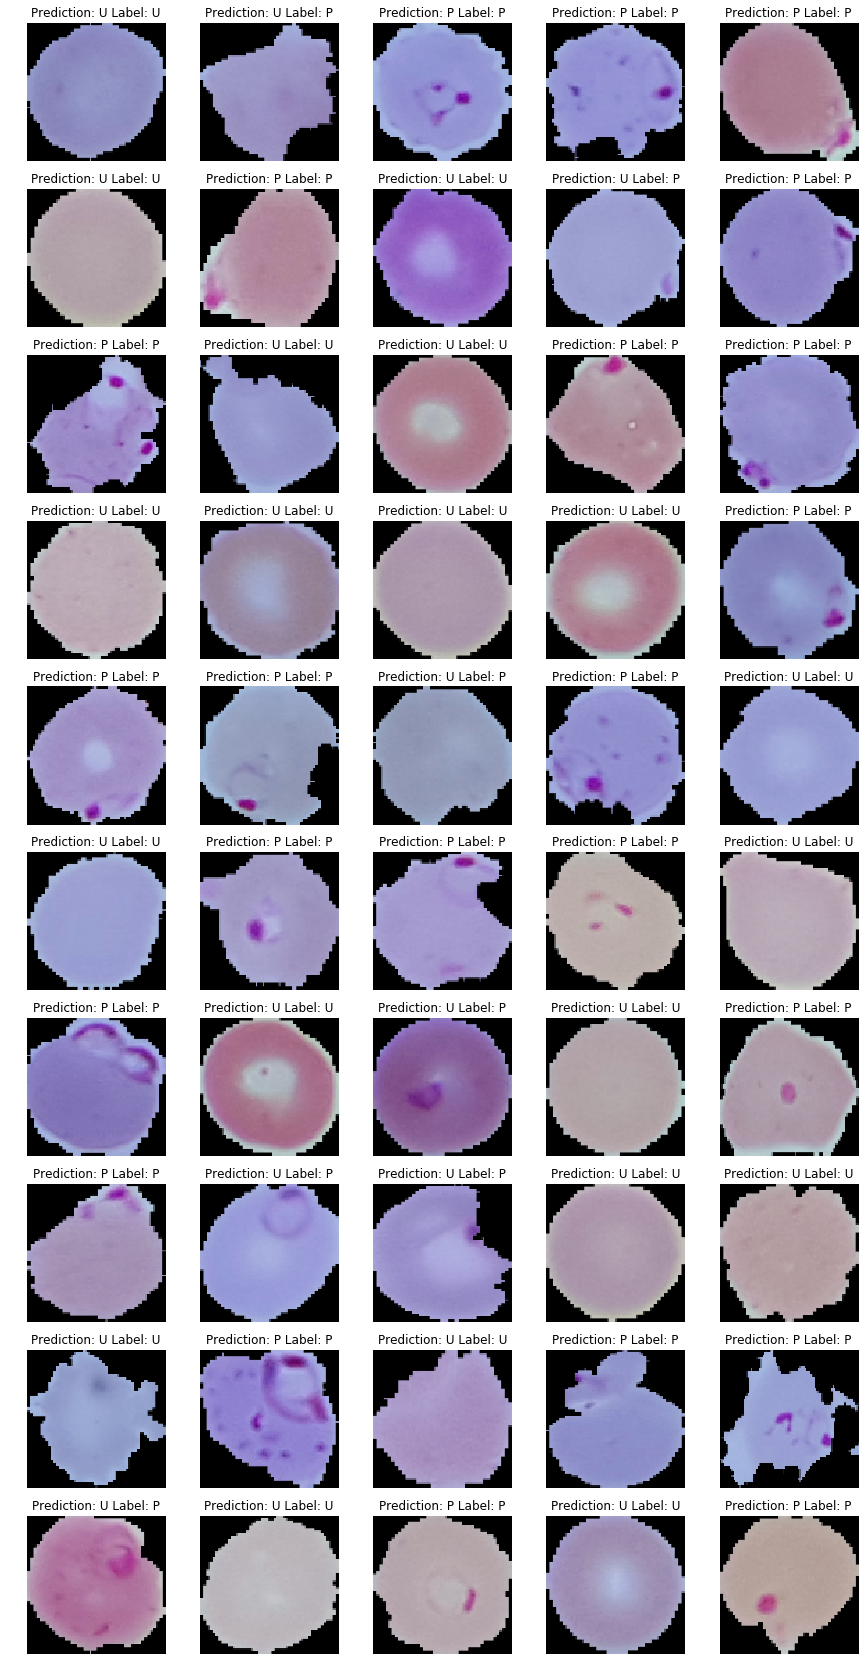

In [16]:
from random import randint
fig = plt.figure(figsize = (15,30))
for i in range(50):
    index = randint(0,testData.shape[0])
    img = testData[index]
    ax = fig.add_subplot(10,5,i+1)
    ax.axis("off")
    ax.imshow(img)
    if round(float(predictions[index])) >= 0.5:
        predictLabel = "P"
    else:
        predictLabel = "U"
    if testLabel[index] >= 0.5:
        actualLabel = "P"
    else:
        actualLabel = "U"    
    plt.title("Prediction: "+ predictLabel +" Label: "+ actualLabel)
plt.show()